In [2]:
# all positions mutated 

import pandas 

df = pandas.read_csv( 'data/clean/production.csv', index_col='mutant' )
df['pos'] = df.index.str[1:-1].astype( int )

print 'select muts, resi', '+'.join( df.pos.astype( str ) )

select muts, resi 222+313+19+409+177+222+323+18+177+300+163+244+175+352+163+171+167+222+220+293+15+154+171+331+195+373+357+325+91+52+177+240+222+220+17+220+423+358+298+167+400+362+325+240+356+120+406+408+4598715651500560876+341+294+14+101+218+119+325+406+354+163+120+220+17+220+404+404+244+72+222+164+164+415+178+315+379+261+293+293+240+16+325+399+403+164+222+353+415+355+119+119+178+315+379+221+323+293+329+19+19+240+76+16+296+120+325+325+34+399+399+399+399+407+407+407+407+166+294+295+295+167+405+413+219+163+313+384+16+147+325+399+399+407+409+294


![](img/all_positions.png)

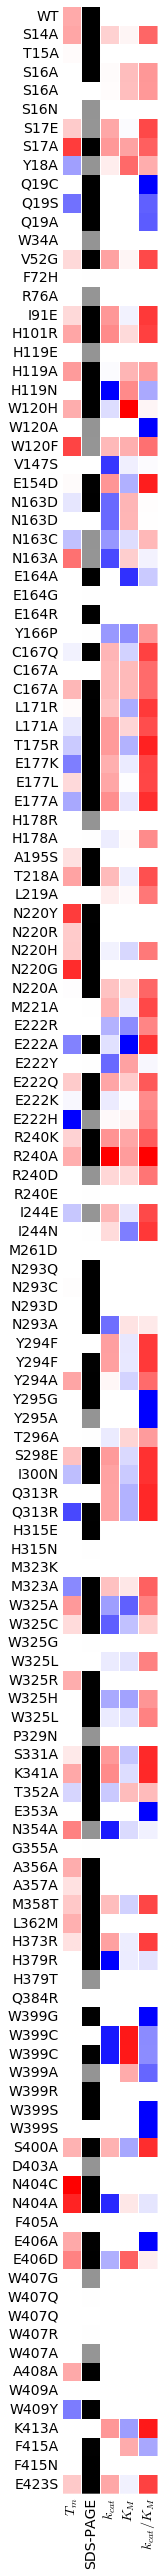

In [1]:
# heatmap 

%matplotlib inline 
import matplotlib.pyplot as plt 
from matplotlib import rc 
from numpy import log
import pandas 

df = pandas.read_csv( 'data/clean/production.csv', index_col='mutant' )
plos = pandas.read_csv( '/Users/alex/Documents/bagel-data/clean_data/plos2015.csv', index_col='name' )
df = df.join( plos, rsuffix='plos_' ) 

df['pos'] = df.index.str[1:-1].astype( int ) 
df['norm_tm'] = df[ 'tm' ] - 39.5
df['norm_kcat'] = log( df[ 'kcat' ] / 880 ) - 1
df['norm_km'] = log( df[ 'km' ] / 0.05 ) - 1
df['norm_kcatkm'] = log( df[ 'kcatkm' ] / 174000 ) - 1
df = df.sort_values( by='pos' ) 

plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-11.8)
rc('axes',edgecolor='none')

font = { 'size': 14 }
rc('font', **font)

plt.subplot( 1, 6, 1 )
plt.imshow( df[ ['norm_tm'] ], interpolation='none', cmap='bwr', origin='upper' ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' )
plt.yticks( range( len( df.index ) ), df.index )
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 2 )
plt.imshow( df[ ['protein_on_gel'] ], interpolation='none', cmap='Greys' ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 

plt.subplot( 1, 6, 3 )
plt.imshow( df[ ['norm_kcat'] ], interpolation='none', cmap='bwr' ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( df[ ['norm_km'] ], interpolation='none', cmap='bwr' ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( df[ ['norm_kcatkm'] ], interpolation='none', cmap='bwr' ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.tight_layout()
plt.savefig( 'fig2/plt_out.png', dpi=300 ) 
plt.show() 

In [4]:
# structure-stability?

# machine learning predictions?

# conservation analysis?